# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])
data

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3
...,...,...
9645,m1380,a816
9646,m1380,a962
9647,m1381,a1225
9648,m1381,a1436


In [4]:
edges = [tuple(x) for x in data.values.tolist()]
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [6]:
A = list(nx.connected_component_subgraphs(B))[0]

In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


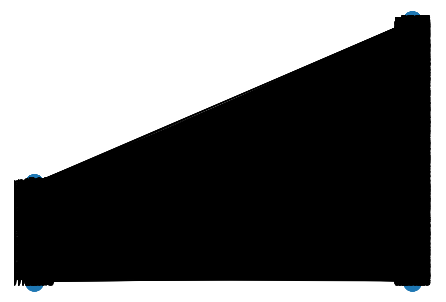

In [8]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [9]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [10]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [11]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [12]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [13]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [14]:
len(node_targets)

4703

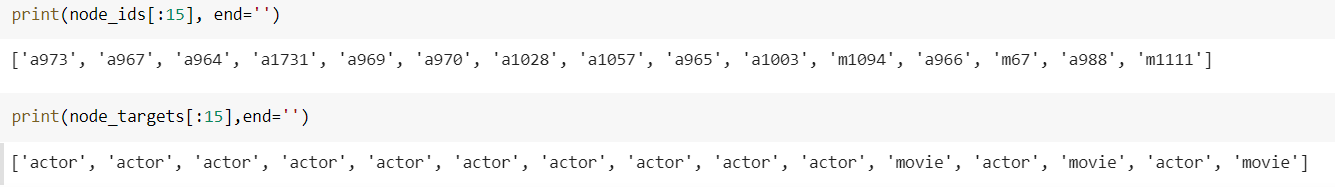

In [15]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    #actor_nodes,movie_nodes=[],[]
    #actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    node_a = [i for i, n in enumerate(node_targets) if n == 'actor']
    node_m = [i for i, n in enumerate(node_targets) if n == 'movie']
    actor_embeddings = (node_embeddings[node_a])
    movie_embeddings = (node_embeddings[node_m])
    actor_nodes=[node_ids[i] for i in node_a]
    movie_nodes=[node_ids[i] for i in node_m]
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings
#     return len(actor_nodes), len(movie_nodes), len(actor_embeddings),len(movie_embeddings)
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [16]:
actor_embeddings.shape

(3411, 128)

<font color='cyan'>Grader function - 1</font>

In [17]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [18]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [19]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    no_of_nodes_largest_connected_comp = len(max(nx.connected_components(graph), key=len))
    total_nodes = graph.number_of_nodes()
    N = number_of_clusters
    cost1 = (1/N)*(no_of_nodes_largest_connected_comp/total_nodes) 
    
    return cost1

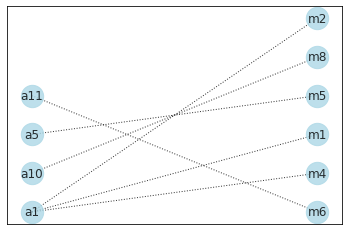

In [20]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [21]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [22]:
def cost2(graph, number_of_clusters) :
    '''In this function, we will calculate cost1'''
    sum_of_degrees_of_nodes = sum(graph. degree(node) for node, data in graph.nodes(data=True) if data['bipartite'] == 0)
    unique_graph_nodes = len([node for node, data in graph.nodes(data= True) if data['bipartite'] == 1])
    N = number_of_clusters
    cost2= (1/N) * (sum_of_degrees_of_nodes/unique_graph_nodes)
    return cost2

<font color='cyan'>Grader function - 4</font>

In [23]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [24]:
%%time
from tqdm import tqdm
cost_ = {}
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]
for k in number_of_clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(actor_embeddings)
    actors_labels = pd.Series(kmeans.labels_)
    
    cost_1 = 0
    cost_2 = 0
    
    for label in actors_labels.unique():
        actor_nodes_ind = list(actors_labels[actors_labels == label].index)
        actor_graph_nodes = np.array(actor_nodes)[actor_nodes_ind]
        ego_graph_nodes = [nx.ego_graph(A, node) for node in actor_graph_nodes]
        cluster_graph = nx.algorithms.operators.all.compose_all(ego_graph_nodes)
        
        cost_1 += cost1(cluster_graph,k)
        cost_2 += cost2(cluster_graph,k)
        cost_[k] = cost_1 * cost_2
print(cost_)
print(max(cost_.items(), key=lambda x:x[1]))


{3: 18.288419391103503, 5: 21.949604467528843, 10: 16.961662264700095, 30: 16.658293147064605, 50: 19.549706326615176, 100: 22.362106525212038, 200: 18.7534750530481, 500: 9.96434222091572}
(100, 22.362106525212038)
Wall time: 1min 57s


# KMeans Tuning

In [25]:
%%time
kmeans = KMeans(n_clusters = 100)
kmeans.fit(actor_embeddings)
cluster_number_for_each_actor_node = kmeans.labels_
print(cluster_number_for_each_actor_node)

[60 23 60 ... 22 22 22]
Wall time: 4.89 s


In [26]:
cluster_number_for_each_actor_node.shape

(3411,)

In [27]:
actor_embeddings.shape

(3411, 128)

<font color='blue'>Displaying similar actor clusters</font>

In [28]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
# perplexity=5
trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)
actor_embeddings_2d.shape

(3411, 2)

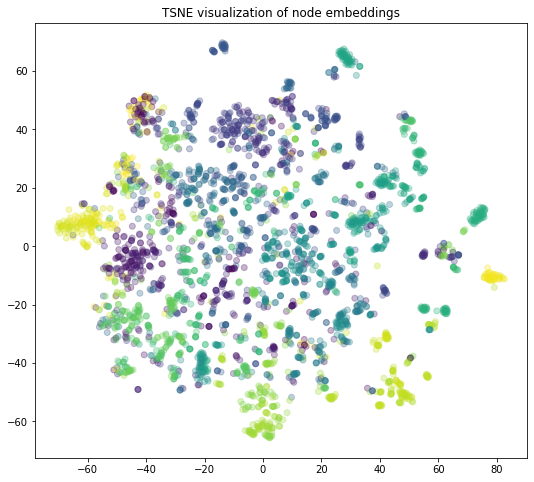

In [29]:
import numpy as np
# draw the points

label_map = {l: i for i, l in enumerate(np.unique(actor_nodes))}
node_colours = [label_map[actor] for actor in actor_nodes]

plt.figure(figsize=(10,8))
plt.axes().set(aspect="equal")
plt.scatter(actor_embeddings_2d[:,0], 
            actor_embeddings_2d[:,1], 
            c = node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [34]:
%%time
from tqdm import tqdm
t2cost_ = {}
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]
for k in number_of_clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(movie_embeddings)
    movies_labels = pd.Series(kmeans.labels_)
    
    t2cost_1 = 0
    t2cost_2 = 0
    
    for label in movies_labels.unique():
        movie_nodes_ind = list(movies_labels[movies_labels == label].index)
        movie_graph_nodes = np.array(movie_nodes)[movie_nodes_ind]
        ego_graph_nodes = [nx.ego_graph(A, node) for node in movie_graph_nodes]
        cluster_graph = nx.algorithms.operators.all.compose_all(ego_graph_nodes)
        
        t2cost_1 += cost1(cluster_graph,k)
        t2cost_2 += cost2(cluster_graph,k)
        t2cost_[k] = t2cost_1 * t2cost_2
print(t2cost_)
print(max(t2cost_.items(), key=lambda x:x[1]))


{3: 2.836805984010517, 5: 2.4176528128128894, 10: 2.6930378371625188, 30: 2.1438237499584543, 50: 1.8679954423027476, 100: 1.57154032244158, 200: 1.3617810586921228, 500: 1.214818688806364}
(3, 2.836805984010517)
Wall time: 35.2 s


# Tuning KMeans

In [35]:
%%time
kmeans = KMeans(n_clusters = 3)
kmeans.fit(movie_embeddings)
cluster_number_for_each_movie_node = kmeans.labels_
print(cluster_number_for_each_movie_node)

[2 2 2 ... 1 1 1]
Wall time: 194 ms


<font color='blue'>Displaying similar movie clusters</font>

In [36]:
%%time
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)
movie_embeddings_2d.shape

Wall time: 7.03 s


(1292, 2)

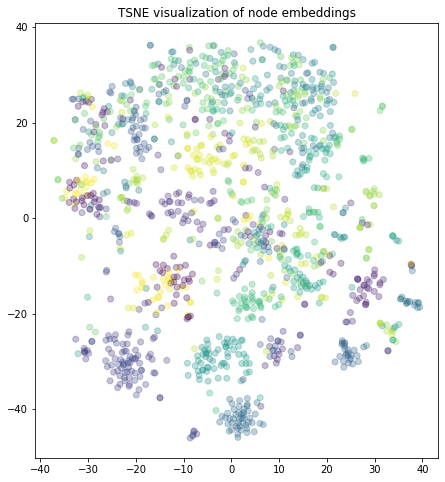

In [37]:
import numpy as np
# draw the points

label_map = {l: i for i, l in enumerate(np.unique(movie_nodes))}
node_colours = [label_map[movie] for movie in movie_nodes]

plt.figure(figsize=(10,8))
plt.axes().set(aspect="equal")
plt.scatter(movie_embeddings_2d[:,0], 
            movie_embeddings_2d[:,1], 
            c = node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()